In [18]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.patches as ppt
import os 
import sys 

path ='../src'
if path not in sys.path:
    sys.path.insert(1,path)
from utils_OB import *
from utils_JK import *
from preposessing import *
import _tracking as tk
import mode_visulizer as mv

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes 
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import seaborn as sns

sns.set_theme(context='paper', style='ticks',color_codes='deep')

In [19]:
matplotlib.use('module://matplotlib_inline.backend_inline')

In [20]:
folder=import_folder_for_tracking('../../5hz_clustered_int/')

In [21]:
freqsHz_prev_studies = np.array([0.05, 0.098, 0.111, 0.141, 0.169, 0.197, 0.211, 0.233, 0.244, 0.272, 0.293, 0.318, 0.331, 0.36, 0.392, 0.394, 0.406, 0.4, 0.462, 0.465, 0.544, 0.551, 0.621, 0.694, 0.709, 0.786, 0.826, 0.892, 0.94, 0.962])

In [22]:
ws,phis,names=folder
freqsHz = radtoHz(ws)

_,freqsHz_below,_, phis_below = divide_modes(freqsHz, phis, freq_lim=0.45) 

In [8]:
mode_traces_magalhaes = tk.perform_tracking_magalhaes2008(freqsHz_below, phis_below)

<bound method Figure.show of <Figure size 504x360 with 1 Axes>>

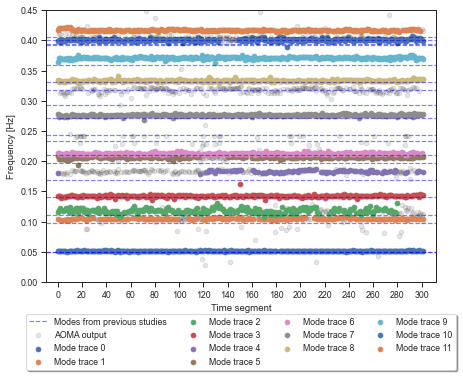

In [53]:
fig, axs = plt.subplots(figsize = (7,5))

for k, freq in enumerate(freqsHz):
    if k == 0: axs.scatter(np.ones_like(freq)*k, freq, color = 'black', alpha=0.1, label = 'AOMA output')
    axs.scatter(np.ones_like(freq)*k, freq, color = 'black', alpha=0.1)


for i, trace in enumerate(mode_traces_magalhaes):
    axs.scatter(trace.time_seg, trace.frequencies, label = 'Mode trace {}'.format(i))

axs.plot([-10, len(freqsHz) + 10], [freqsHz_prev_studies[0], freqsHz_prev_studies[0]], color = 'blue', linestyle = 'dashed', alpha = 0.5, label = 'Modes from previous studies')
axs.plot([np.zeros_like(freqsHz_prev_studies)-10, np.ones_like(freqsHz_prev_studies)*len(freqsHz)+10], [freqsHz_prev_studies, freqsHz_prev_studies], color = 'blue', alpha = 0.5,linestyle='dashed')


axs.set_xticks(np.arange(0, len(freqsHz),20))
axs.set_ylim((0, 0.45))
axs.set_xlabel('Time segment')
axs.set_ylabel('Frequency [Hz]')
axs.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=4)
axs.set_xlim(-10, len(freqsHz) + 10)


#fig.savefig('./figures_bridge_tracking/magalhaes2008_bridge_tracking', dpi = 300, bbox_inches = 'tight')

fig.show

In [55]:
mode_traces_he = tk.perform_tracking_He2022(freqsHz_below, phis_below)

<bound method Figure.show of <Figure size 504x360 with 1 Axes>>

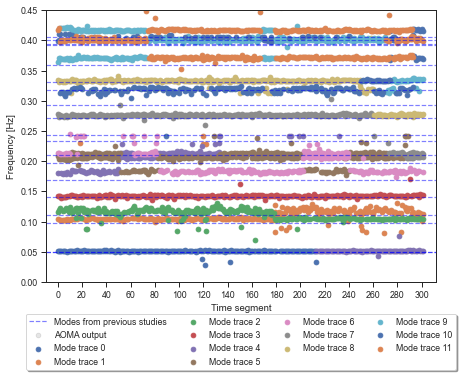

In [57]:
fig, axs = plt.subplots(figsize = (7,5))

for k, freq in enumerate(freqsHz):
    if k == 0: axs.scatter(np.ones_like(freq)*k, freq, color = 'black', alpha=0.1, label = 'AOMA output')
    axs.scatter(np.ones_like(freq)*k, freq, color = 'black', alpha=0.1)


for i, trace in enumerate(mode_traces_he):
    axs.scatter(trace.time_seg, trace.frequencies, label = 'Mode trace {}'.format(i))

axs.plot([-10, len(freqsHz) + 10], [freqsHz_prev_studies[0], freqsHz_prev_studies[0]], color = 'blue', linestyle = 'dashed', alpha = 0.5, label = 'Modes from previous studies')
axs.plot([np.zeros_like(freqsHz_prev_studies)-10, np.ones_like(freqsHz_prev_studies)*len(freqsHz)+10], [freqsHz_prev_studies, freqsHz_prev_studies], color = 'blue', alpha = 0.5,linestyle='dashed')


axs.set_xticks(np.arange(0, len(freqsHz),20))
axs.set_ylim((0, 0.45))
axs.set_xlabel('Time segment')
axs.set_ylabel('Frequency [Hz]')
axs.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=4)
axs.set_xlim(-10, len(freqsHz) + 10)


fig.savefig('./figures_bridge_tracking/he2022_bridge_tracking', dpi = 300, bbox_inches = 'tight')

fig.show

### Cabboi 2016

In [17]:
mode_traces_cabboi = tk.perform_tracking_cabboi(freqsHz_below, phis_below, ref_mode_frequenciesHz=freqsHz_below[0], ref_mode_modeshapes=phis_below[0])

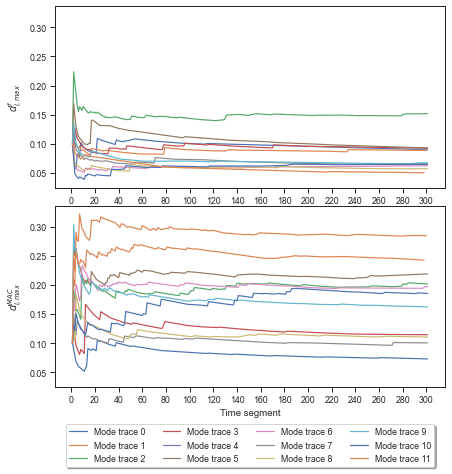

In [18]:
fig = plt.figure(figsize=(7,7))
gs = fig.add_gridspec(2, hspace=0.1)
axs = gs.subplots(sharex=False, sharey=True)

for i, trace in enumerate(mode_traces_cabboi):
    axs[0].plot(np.arange(1, len(trace.df_threshold_list)+1, 1), trace.df_threshold_list, label = 'Mode trace {}'.format(i))
    axs[1].plot(np.arange(1, len(trace.dmac_threshold_list)+1, 1), trace.dmac_threshold_list, label = 'Mode trace {}'.format(i))

axs[0].set_ylabel('$d_{i,max}^{f}$')
axs[0].set_xticks(np.arange(0,len(freqsHz),20))

axs[1].set_ylabel('$d_{i,max}^{MAC}$')
axs[1].set_xticks(np.arange(0,len(freqsHz),20))
axs[1].set_xlabel('Time segment')

axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.18),
          fancybox=True, shadow=True, ncol=4)

fig.savefig('./figures_bridge_tracking/cabboi2016_bridge_dyn_thresholds', dpi = 300, bbox_inches = 'tight')

<bound method Figure.show of <Figure size 504x360 with 1 Axes>>

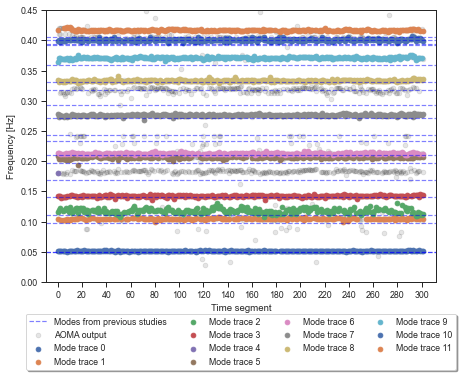

In [19]:
fig, axs = plt.subplots(figsize = (7,5))

for k, freq in enumerate(freqsHz):
    if k == 0: axs.scatter(np.ones_like(freq)*k, freq, color = 'black', alpha=0.1, label = 'AOMA output')
    axs.scatter(np.ones_like(freq)*k, freq, color = 'black', alpha=0.1)


for i, trace in enumerate(mode_traces_cabboi):
    axs.scatter(trace.time_seg, trace.frequencies, label = 'Mode trace {}'.format(i))

axs.plot([-10, len(freqsHz) + 10], [freqsHz_prev_studies[0], freqsHz_prev_studies[0]], color = 'blue', linestyle = 'dashed', alpha = 0.5, label = 'Modes from previous studies')
axs.plot([np.zeros_like(freqsHz_prev_studies)-10, np.ones_like(freqsHz_prev_studies)*len(freqsHz)+10], [freqsHz_prev_studies, freqsHz_prev_studies], color = 'blue', alpha = 0.5,linestyle='dashed')


axs.set_xticks(np.arange(0, len(freqsHz),20))
axs.set_ylim((0, 0.45))
axs.set_xlabel('Time segment')
axs.set_ylabel('Frequency [Hz]')
axs.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=4)
axs.set_xlim(-10, len(freqsHz) + 10)


#fig.savefig('./figures_bridge_tracking/cabboi2016_bridge_tracking', dpi = 300, bbox_inches = 'tight')

fig.show

In [48]:
help(koma.modal.align_modes)

Help on function align_modes in module koma.modal:

align_modes(phi)
    Flip complex-valued or real-valued mode shapes such that similar modes have the same sign.
    
    Arguments
    ---------------------------
    phi : double
        complex-valued (or real-valued) modal transformation matrix (column-wise stacked mode shapes)
    
    Returns
    ---------------------------
    phi_aligned : boolean
        aligned complex-valued (or real-valued) modal transformation matrix



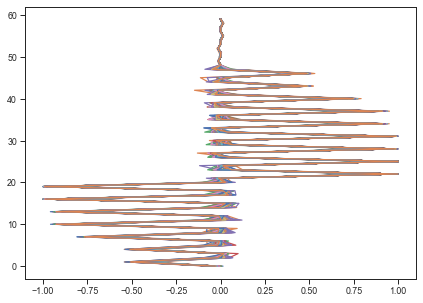

In [52]:
matplotlib.use('module://matplotlib_inline.backend_inline')

fig, axs = plt.subplots(figsize = (7,5))
Phi = np.array(mode_traces_cabboi[0].mode_shapes)

Phi_alignedT = koma.modal.align_modes(Phi.T)
Phi_aligned = Phi_alignedT.T

for i, phi in enumerate(Phi_aligned):
    axs.plot(np.real(phi), np.arange(phi.shape[0]))
    

### Modal tracking concept 1

In [40]:
n = 20
mode_traces_mtc1 = tk.perform_tracking(freqsHz_below, phis_below, n = n, m = 20, d_track_threshold=0.25, method='average')

<bound method Figure.show of <Figure size 504x360 with 1 Axes>>

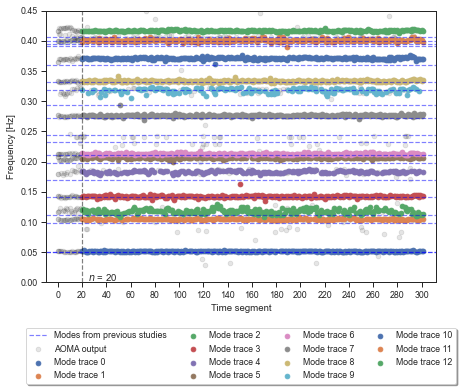

In [41]:
fig, axs = plt.subplots(figsize = (7,5))

for k, freq in enumerate(freqsHz):
    if k == 0: axs.scatter(np.ones_like(freq)*k, freq, color = 'black', alpha=0.1, label = 'AOMA output')
    axs.scatter(np.ones_like(freq)*k, freq, color = 'black', alpha=0.1)


for i, trace in enumerate(mode_traces_mtc1):
    axs.scatter(np.array(trace.time_seg) + n, trace.frequencies, label = 'Mode trace {}'.format(i))

axs.plot([-10, len(freqsHz) + 10], [freqsHz_prev_studies[0], freqsHz_prev_studies[0]], color = 'blue', linestyle = 'dashed', alpha = 0.5, label = 'Modes from previous studies')
axs.plot([np.zeros_like(freqsHz_prev_studies)-10, np.ones_like(freqsHz_prev_studies)*len(freqsHz) +10], [freqsHz_prev_studies, freqsHz_prev_studies], color = 'blue', alpha = 0.5,linestyle='dashed')

axs.plot([n, n], [0, 0.45], linestyle = 'dashed', color = 'black', alpha = 0.5)
axs.annotate('$n$ = {}'.format(n), xy = (25, 0.003))

axs.set_xticks(np.arange(0, len(freqsHz),20))
axs.set_ylim((0, 0.45))
axs.set_xlabel('Time segment')
axs.set_ylabel('Frequency [Hz]')
axs.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=4)
axs.set_xlim(-10, len(freqsHz) + 10)


#fig.savefig('./figures_bridge_tracking/mtc1_bridge_tracking', dpi = 300, bbox_inches = 'tight')

fig.show

In [23]:
mode_traces_mtc2 = tk.perform_tracking_continuous(freqsHz_below, phis_below, tcheck = 10, m = 14, update_ref=True, update_thresholds=True, df_max=0.1, dmac_max=0.1)

<bound method Figure.show of <Figure size 504x360 with 1 Axes>>

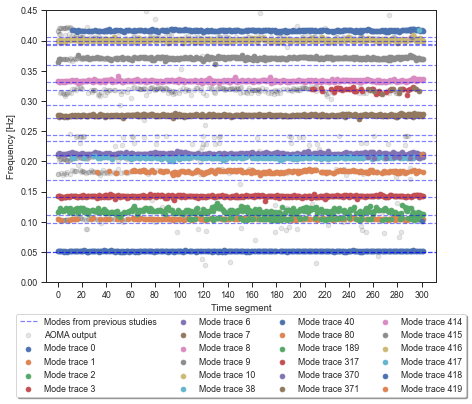

In [24]:
fig, axs = plt.subplots(figsize = (7,5))

for k, freq in enumerate(freqsHz):
    if k == 0: axs.scatter(np.ones_like(freq)*k, freq, color = 'black', alpha=0.1, label = 'AOMA output')
    axs.scatter(np.ones_like(freq)*k, freq, color = 'black', alpha=0.1)


for i, trace in enumerate(mode_traces_mtc2):
    if trace.isphysical: axs.scatter(trace.time_seg, trace.frequencies, label = 'Mode trace {}'.format(i))

axs.plot([-10, len(freqsHz) + 10], [freqsHz_prev_studies[0], freqsHz_prev_studies[0]], color = 'blue', linestyle = 'dashed', alpha = 0.5, label = 'Modes from previous studies')
axs.plot([np.zeros_like(freqsHz_prev_studies)-10, np.ones_like(freqsHz_prev_studies)*len(freqsHz)+10], [freqsHz_prev_studies, freqsHz_prev_studies], color = 'blue', alpha = 0.5,linestyle='dashed')


axs.set_xticks(np.arange(0, len(freqsHz),20))
axs.set_ylim((0, 0.45))
axs.set_xlabel('Time segment')
axs.set_ylabel('Frequency [Hz]')
axs.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=4)
axs.set_xlim(-10, len(freqsHz) + 10)

#fig.savefig('./figures_bridge_tracking/mtc2_bridge_tracking', dpi = 300, bbox_inches = 'tight')

fig.show

0.1041971932660851


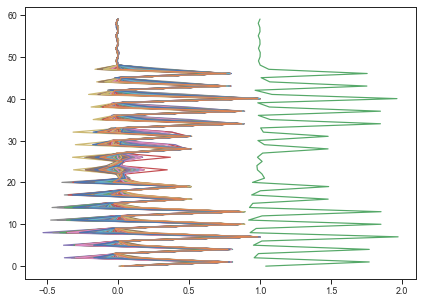

In [17]:
fig, ax = plt.subplots(figsize = (7,5))

index = 1

#ax.scatter(mode_traces_mtc2[2].time_seg, mode_traces_mtc2[2].frequencies, label = 'Mode trace {}'.format(2))

Phi = np.array(mode_traces_mtc2[index].mode_shapes)

PhiT = koma.modal.align_modes(Phi.T)
Phi = PhiT.T

ref_phi = np.mean(Phi, axis=0)
for i, phi in enumerate(Phi):
    ax.plot(np.real(phi),np.arange(0, phi.shape[0]))

print(mode_traces_mtc2[index].ref_frequency)

ax.plot(np.real(mode_traces_mtc2[index].ref_mode_shape)+1,np.arange(0, Phi[0].shape[0]))